In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download information (source: Spanish Ministry of Health https://cnecovid.isciii.es/)
!wget -q -O 'evolution.csv' https://cnecovid.isciii.es/covid19/resources/datos_provincias.csv

In [3]:
# Read the CSV file downloaded into a dataframe
df_evol = pd.read_csv('evolution.csv', sep=',')
df_evol.head(10)

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,A,2020-01-01,2,1,0,1,0
1,AB,2020-01-01,0,0,0,0,0
2,AL,2020-01-01,0,0,0,0,0
3,AV,2020-01-01,0,0,0,0,0
4,B,2020-01-01,0,0,0,0,0
5,BA,2020-01-01,0,0,0,0,0
6,BI,2020-01-01,0,0,0,0,0
7,BU,2020-01-01,0,0,0,0,0
8,C,2020-01-01,0,0,0,0,0
9,CA,2020-01-01,0,0,0,0,0


In [4]:
# Check the size of the df
df_evol.shape

(16484, 7)

In [5]:
df_evol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16484 entries, 0 to 16483
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   provincia_iso                 16167 non-null  object
 1   fecha                         16484 non-null  object
 2   num_casos                     16484 non-null  int64 
 3   num_casos_prueba_pcr          16484 non-null  int64 
 4   num_casos_prueba_test_ac      16484 non-null  int64 
 5   num_casos_prueba_otras        16484 non-null  int64 
 6   num_casos_prueba_desconocida  16484 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 901.6+ KB


In [6]:
df_evol.describe()

,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
count,16484.000000,16484.000000,16484.000000,16484.000000,16484.000000
mean,86.289614,79.417314,0.278634,6.476705,0.116962
std,285.811030,268.666801,1.547705,50.128440,1.384439
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,10.000000,10.000000,0.000000,0.000000,0.000000
75%,70.000000,67.000000,0.000000,0.000000,0.000000
max,6735.000000,6722.000000,32.000000,1226.000000,65.000000


In [7]:
# Rename columns
df_evol.rename(columns={'provincia_iso':'region', 'fecha':'date', 'num_casos':'cases', 'num_casos_prueba_pcr':'pcr', 'num_casos_prueba_test_ac':'test_ac', 'num_casos_prueba_otras':'other', 'num_casos_prueba_desconocida':'unknown'}, inplace=True)

# Date column to datetime type
df_evol['date'] = pd.to_datetime(df_evol['date'])
df_evol.dtypes

df_evol.head(10)

,region,date,cases,pcr,test_ac,other,unknown
0,A,2020-01-01,2,1,0,1,0
1,AB,2020-01-01,0,0,0,0,0
2,AL,2020-01-01,0,0,0,0,0
3,AV,2020-01-01,0,0,0,0,0
4,B,2020-01-01,0,0,0,0,0
5,BA,2020-01-01,0,0,0,0,0
6,BI,2020-01-01,0,0,0,0,0
7,BU,2020-01-01,0,0,0,0,0
8,C,2020-01-01,0,0,0,0,0
9,CA,2020-01-01,0,0,0,0,0


In [8]:
# By region

df_region = df_evol.groupby('region').sum().reset_index()
df_region.sort_values(['cases'], ascending=False, axis=0, inplace=True)
del df_region['cases']
df_region.set_index('region', inplace=True)
df_region.head(10)

,pcr,test_ac,other,unknown
region,,,,
M,290866,22,37997,0
B,199826,1,1858,1175
Z,43241,0,5395,57
MU,43087,116,4279,17
SE,33068,58,10283,0
V,42144,202,503,85
BI,40563,0,1696,91
GR,31994,69,2477,0
TO,27296,638,1556,4


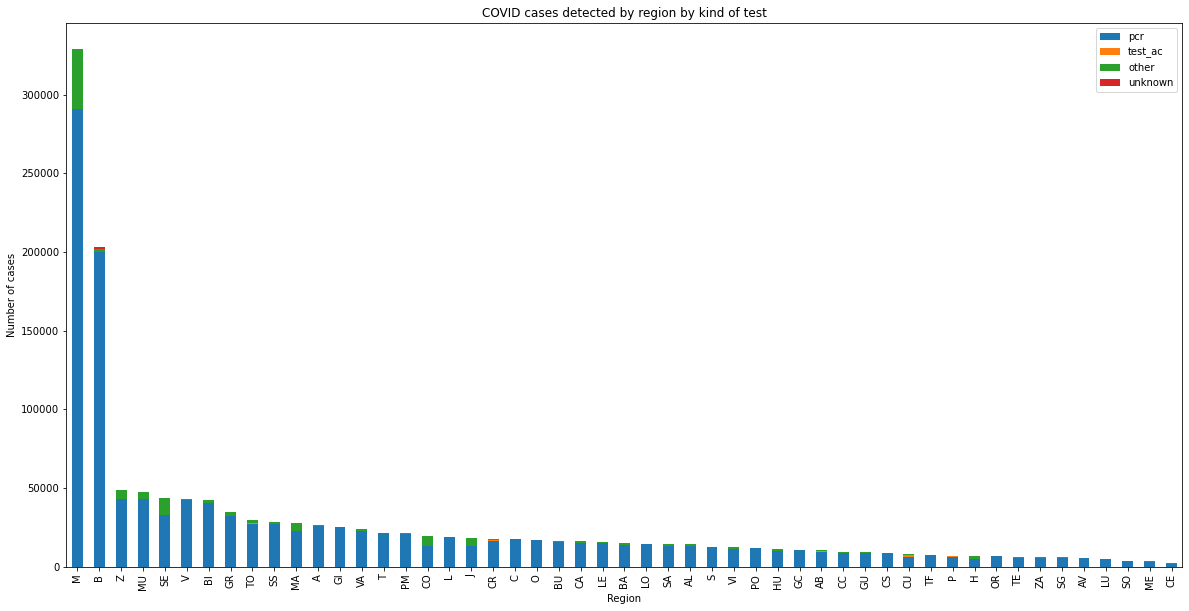

In [9]:
df_region.plot(kind='bar', 
             stacked=True,
             figsize=(20, 10),
             )

plt.title('COVID cases detected by region by kind of test')
plt.ylabel('Number of cases')
plt.xlabel('Region')

plt.show()

In [10]:
# By date

df_date = df_evol.groupby('date').sum().reset_index()
del df_date['cases']
df_date.sort_values(['date'], ascending=True, axis=0, inplace=True)
df_date.set_index('date', inplace=True)
df_date.head(10)

,pcr,test_ac,other,unknown
date,,,,
2020-01-01,4,0,1,0
2020-01-02,6,0,0,0
2020-01-03,1,0,0,0
2020-01-04,1,0,0,0
2020-01-05,2,0,0,0
2020-01-06,0,0,1,0
2020-01-07,2,0,0,0
2020-01-08,1,0,1,0
2020-01-09,0,0,0,0


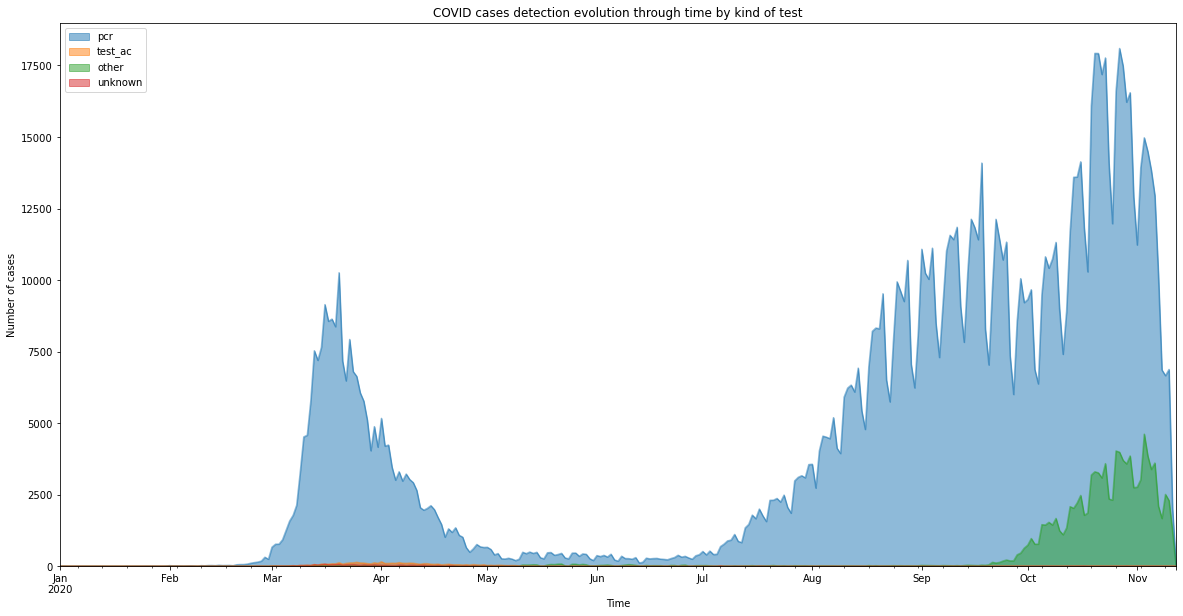

In [11]:
df_date.plot(kind='area', 
             stacked=False,
             alpha=0.5,
             figsize=(20, 10),
             )

plt.title('COVID cases detection evolution through time by kind of test')
plt.ylabel('Number of cases')
plt.xlabel('Time')

plt.show()

In [12]:
# Correlation

df_evol[['cases','pcr', 'test_ac', 'other', 'unknown']].corr()

,cases,pcr,test_ac,other,unknown
cases,1.000000,0.985544,-0.003640,0.415328,0.154542
pcr,0.985544,1.000000,-0.006422,0.255367,0.159904
test_ac,-0.003640,-0.006422,1.000000,-0.017287,0.002854
other,0.415328,0.255367,-0.017287,1.000000,-0.003591
unknown,0.154542,0.159904,0.002854,-0.003591,1.000000


In [13]:
pearson_coef, p_value = stats.pearsonr(df_evol['cases'], df_evol['pcr'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_evol['cases'], df_evol['test_ac'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_evol['cases'], df_evol['other'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_evol['cases'], df_evol['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9855440877276274  with a P-value of P = 0.0
The Pearson Correlation Coefficient is -0.0036401312461791773  with a P-value of P = 0.6402690399050847
The Pearson Correlation Coefficient is 0.41532776336637633  with a P-value of P = 0.0
The Pearson Correlation Coefficient is 0.15454176062999933  with a P-value of P = 1.2237858324025643e-88
